In [69]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
df = pd.read_csv('wnba.csv')
df.head()

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,...,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
0,Aerial Powers,DAL,F,183,71.0,21.200991,US,"January 17, 1994",23,Michigan State,...,6,22,28,12,3,6,12,93,0,0
1,Alana Beard,LA,G/F,185,73.0,21.329438,US,"May 14, 1982",35,Duke,...,19,82,101,72,63,13,40,217,0,0
2,Alex Bentley,CON,G,170,69.0,23.875433,US,"October 27, 1990",26,Penn State,...,4,36,40,78,22,3,24,218,0,0
3,Alex Montgomery,SAN,G/F,185,84.0,24.543462,US,"December 11, 1988",28,Georgia Tech,...,35,134,169,65,20,10,38,188,2,0
4,Alexis Jones,MIN,G,175,78.0,25.469388,US,"August 5, 1994",23,Baylor,...,3,9,12,12,7,0,14,50,0,0


In [39]:
def exp_lab(row):
    if row['Experience'] == 'R':
        return "Rookie"
    elif int(row['Experience']) >= 1 and int(row['Experience']) <= 3:
        return "Little experience"
    elif int(row['Experience']) >= 4 and int(row['Experience']) < 5:
        return "Experienced"
    elif int(row['Experience']) >= 5 and int(row['Experience']) < 10:
        return "Very experienced"
    else:
        return "Veteran"

In [40]:
df['exp_ordinal'] = df.apply(exp_lab,axis=1)

In [44]:
rookies = df[df['exp_ordinal'] == 'Rookie']
little_xp = df[df['exp_ordinal'] == 'Little experience']
experienced = df[df['exp_ordinal'] == 'Experienced']
very_xp = df[df['exp_ordinal'] == 'Very experienced']
veterans =  df[df['exp_ordinal'] == 'Veteran']

In [47]:
def get_freq(subset):
    return subset['Pos'].value_counts()

In [62]:
rookie_distro = get_freq(rookies)
little_xp_distro = get_freq(little_xp)
experienced_distro = get_freq(experienced)
very_xp_distro = get_freq(very_xp)
veterans_distro = get_freq(veterans)

## Grouped bar plot

In [74]:
df[['Pos','exp_ordinal']].head()

,Pos,exp_ordinal
0,F,Little experience
1,G/F,Veteran
2,G,Experienced
3,G/F,Very experienced
4,G,Rookie


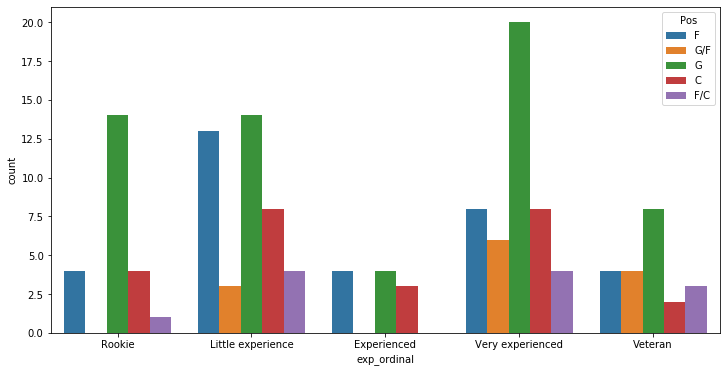

In [78]:
plt.figure(figsize=(12,6))
sns.countplot(x = 'exp_ordinal',
              hue = 'Pos',
              order=['Rookie','Little experience','Experienced','Very experienced','Veteran'],
              hue_order=['F','G/F','G','C','F/C'],
              data = df)


In [86]:
def age_ordinal(row):
    if row['Age'] > df['Age'].mean():
        return 'old'
    else:
        return 'young'

In [89]:
def min_ordinal(row):
    if row['MIN'] > df['MIN'].mean():
        return "average or above"
    else:
        return "below average"

In [90]:
# df['Age'].apply(lambda x: 'old' if x >= 27 else 'young')
# df['MIN'].apply(lambda x: 'average or above' if x >= 497 else
#                                            'below average')

In [91]:
df['age_ord'] = df.apply(age_ordinal,axis=1)
df['MIN_ord'] = df.apply(min_ordinal,axis=1)

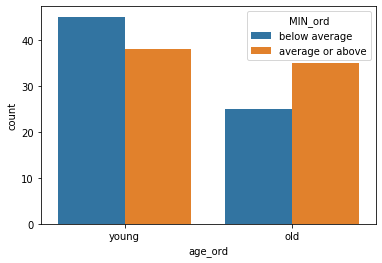

In [92]:
sns.countplot(x='age_ord',
             hue='MIN_ord',
             data=df)